# FINAL PROJECT

## 1) PROBLEM STATEMENT
. This project understands whether a person will accept the coupon recommended to him in different driving scenarios

## 2) DATA COLLECTION
. Data Source - https://archive.ics.uci.edu/dataset/603/in+vehicle+coupon+recommendation(Note:First login to UCI Machine Learning Respiratory)

. The data consists of 25 columns and 12,684 rows

## 3) DATASET INFORMATION
. This data was collected via a survey on Amazon Mechanical Turk.

. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., 
 and then ask the person whether they will accept the coupon if they are the driver.

. For more information about the dataset, please refer to the paper:

. Wang, Tong, Cynthia Rudin, Finale Doshi-Velez, Yimin Liu, Erica Klampfl, and Perry MacNeille.
  'A Bayesian framework for learning rule sets for interpretable classification.
  ' The Journal of Machine Learning Research 18, no. 1 (2017): 2357-2393.

## 4) SUMMARY

. The dataset has 12,684 rows and 25 columns.

The target variable is "Y" (1: accepted coupon, 0: did not accept).

Most columns are categorical, while a few are numerical.

Some columns have missing values, especially "car" (only 108 non-null values).

. Next Steps:

1. Handle Missing Values (impute or drop).


2. Encode Categorical Variables for classification models.


3. Visualize Data for insights.


4. Build and Evaluate Classification Models (e.g., Logistic Regression, Decision Tree Classifier, Random Forest Classifier, SVM Classifier,
                                             KNN Classifier ).

# IMPORT LIBRARIES

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split                  
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [10]:
import warnings
warnings.filterwarnings('ignore')

# LOAD DATASET

In [12]:
df = pd.read_csv('vehicle-coupon-recommendation.csv')

In [13]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [15]:
df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
df.shape

(12684, 26)

# CHECK NULL VALUES

In [18]:
df.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

# FILL MISSING VALUES

In [20]:
for column in df.select_dtypes(include=['object']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [21]:
for column in df.select_dtypes(include=['number']).columns:
    df[column].fillna(df[column].mean(), inplace=True)

# DROP DUPLICATE ROWS

In [23]:
df.drop_duplicates(inplace=True)

In [24]:
df.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  car                   12610 non-null  object
 15  Bar                   12610 non-null  obj

# PAIR PLOT

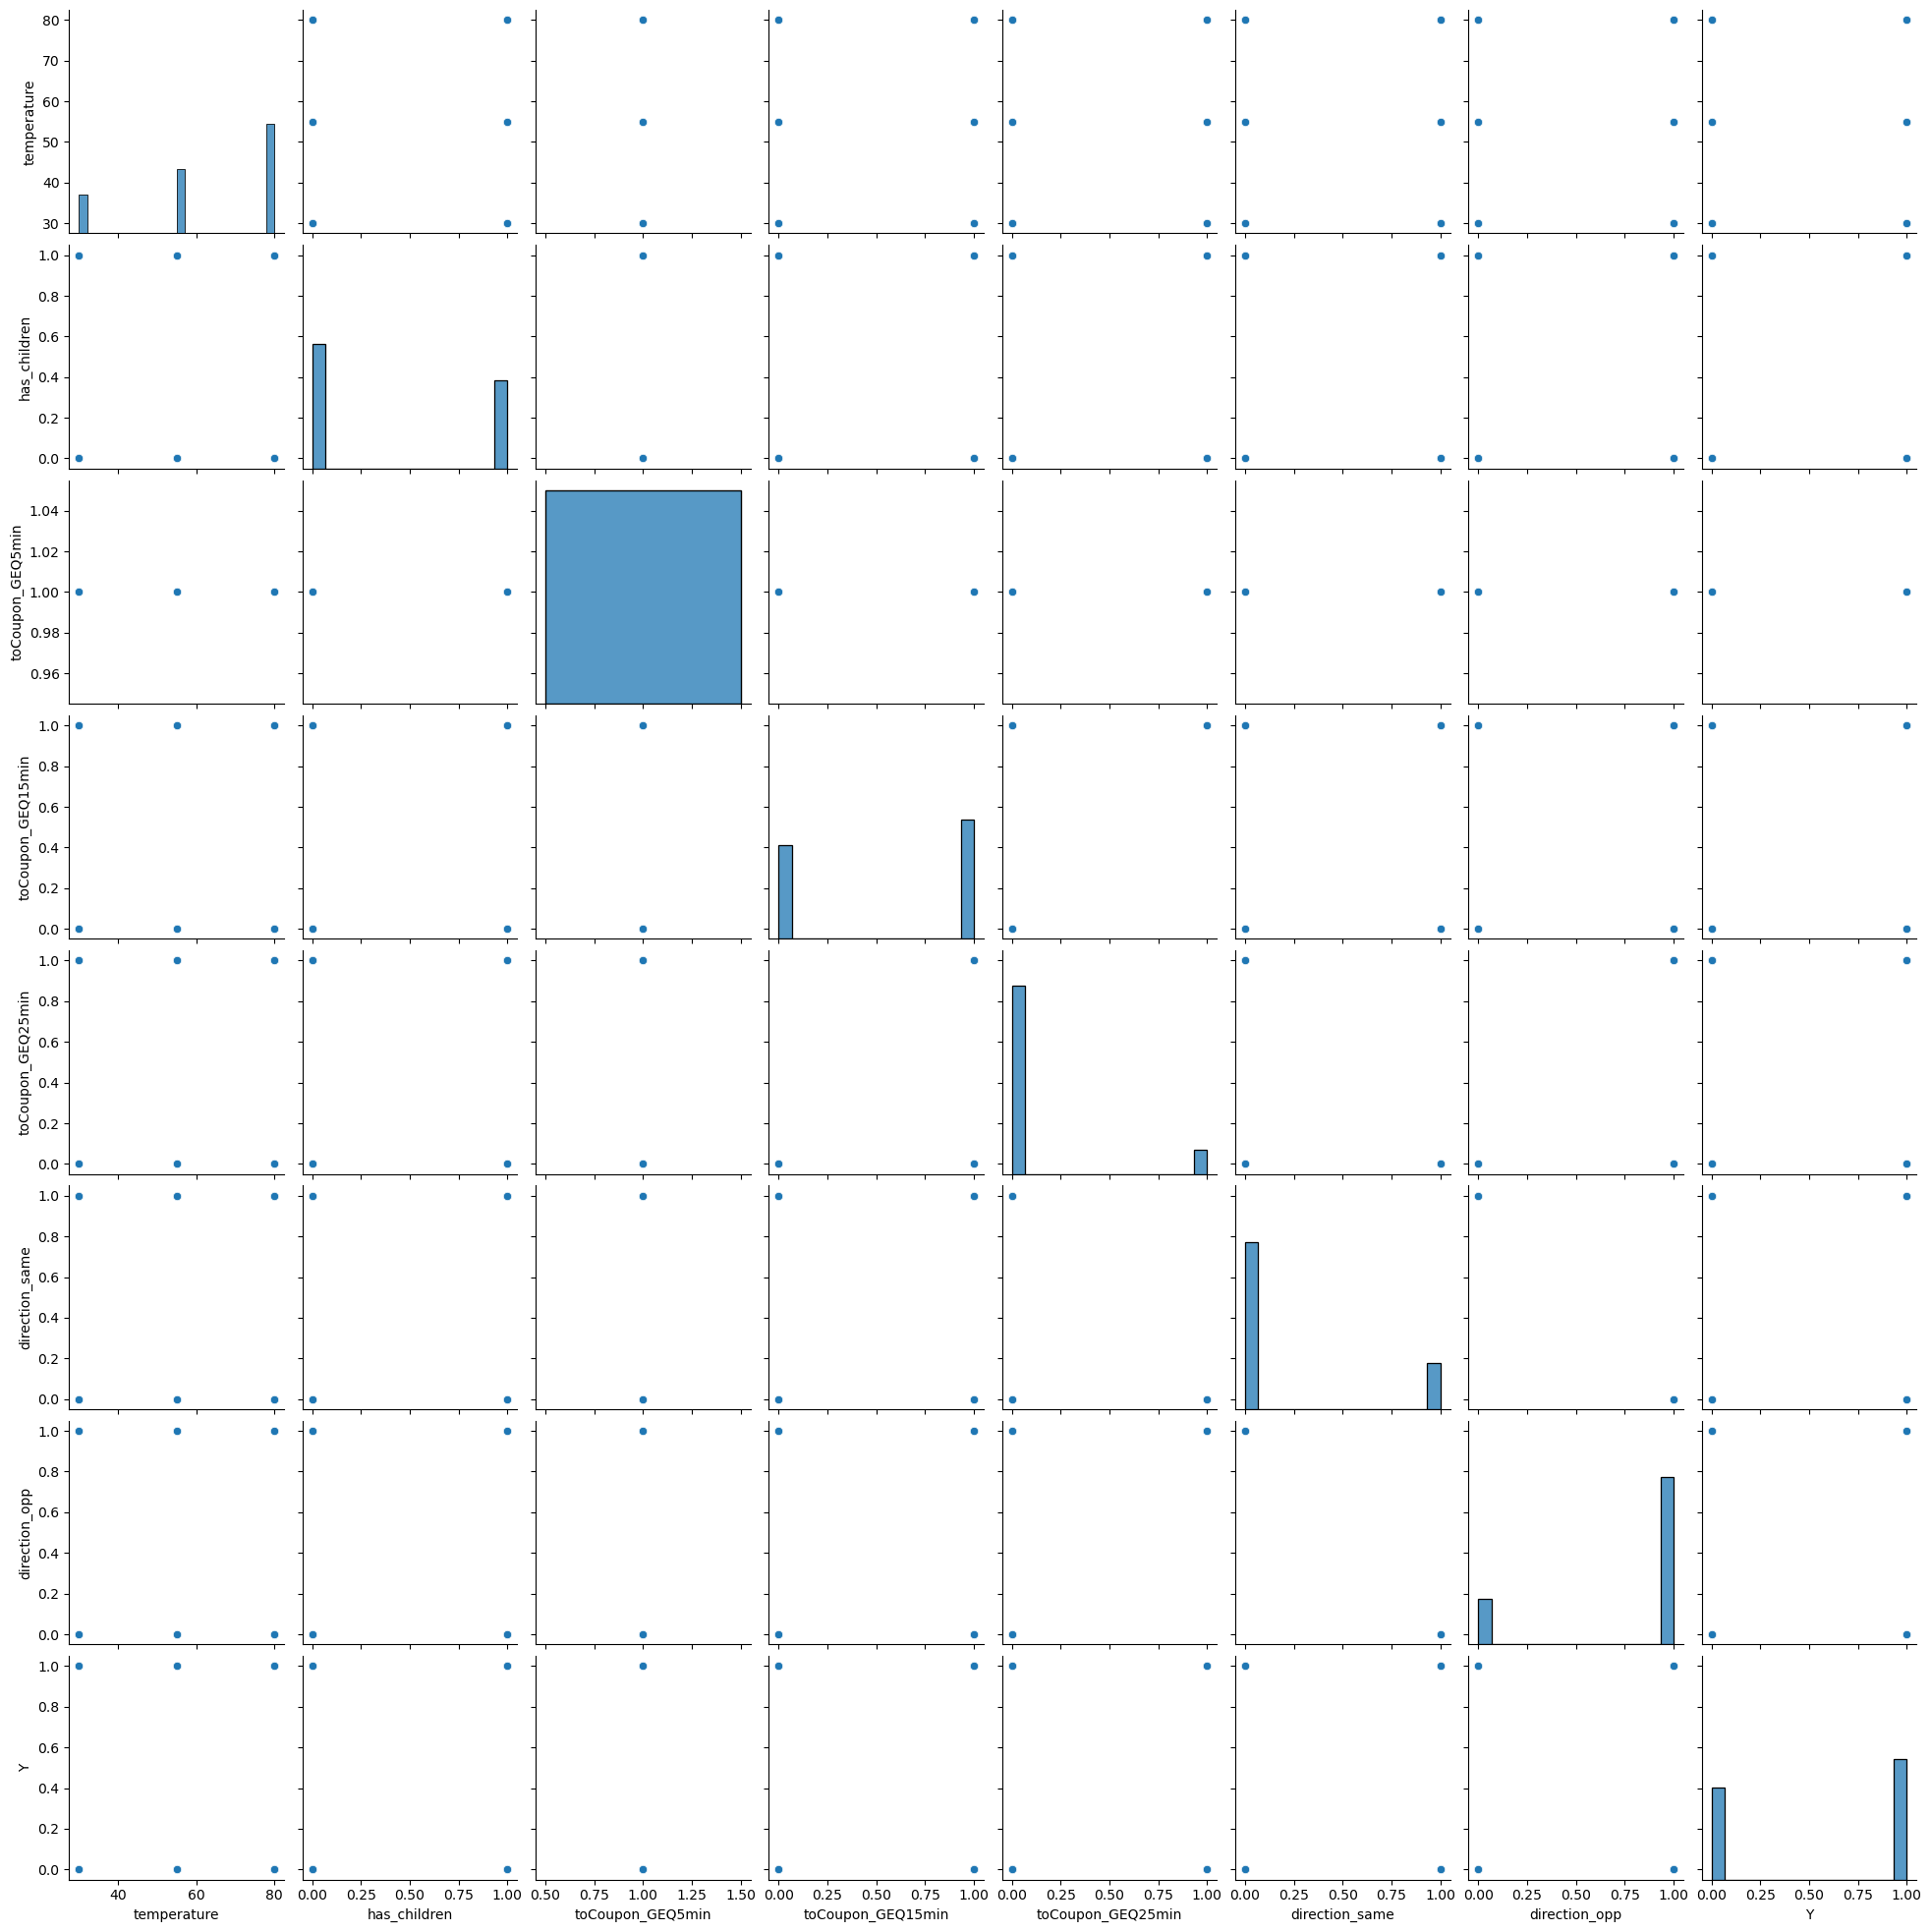

In [27]:
numeric_cols = df.select_dtypes(include=["number"]).columns

sns.pairplot(df[numeric_cols])
plt.show()

# COUNT PLOT

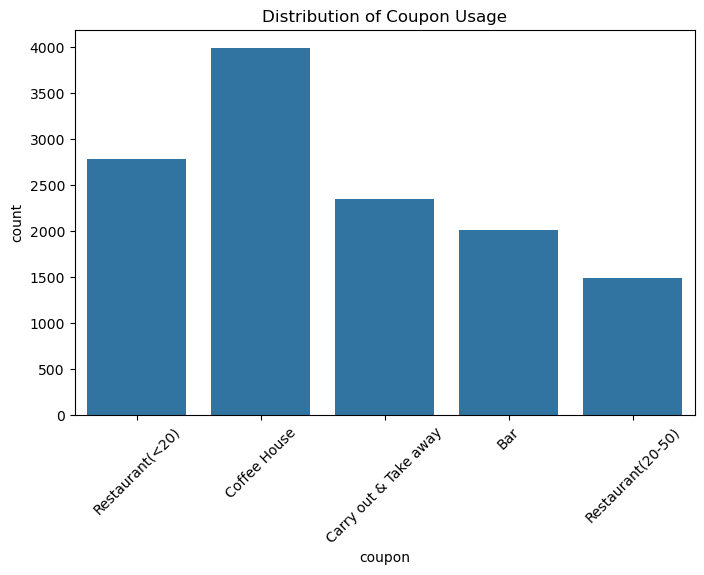

In [29]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="coupon")
plt.title("Distribution of Coupon Usage")
plt.xticks(rotation=45)
plt.show()

# BOX PLOT ( based on age distribution for different coupons)

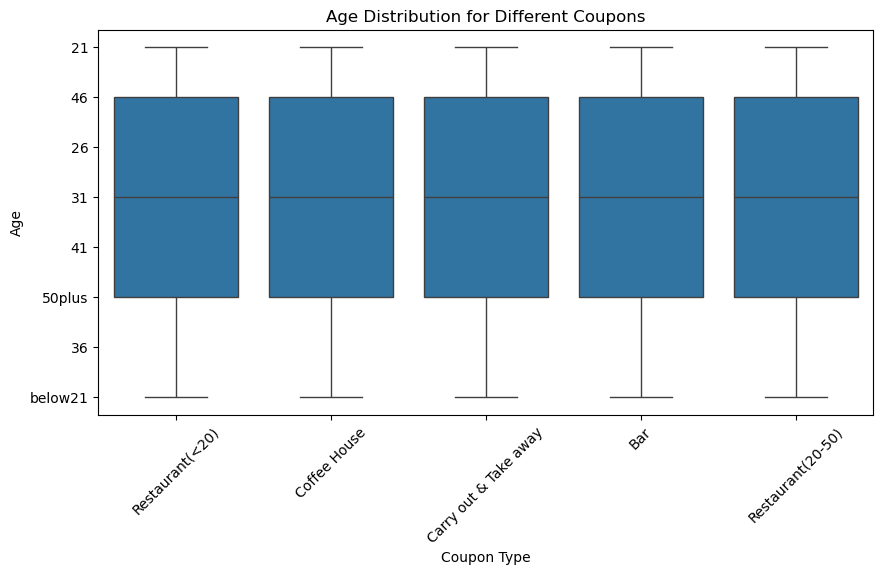

In [31]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="coupon", y="age", data=df)
plt.title("Age Distribution for Different Coupons")
plt.xlabel("Coupon Type")
plt.ylabel("Age")
plt.xticks(rotation=45)
plt.show()

# BOX PLOT ( based on income distribution based on education level)

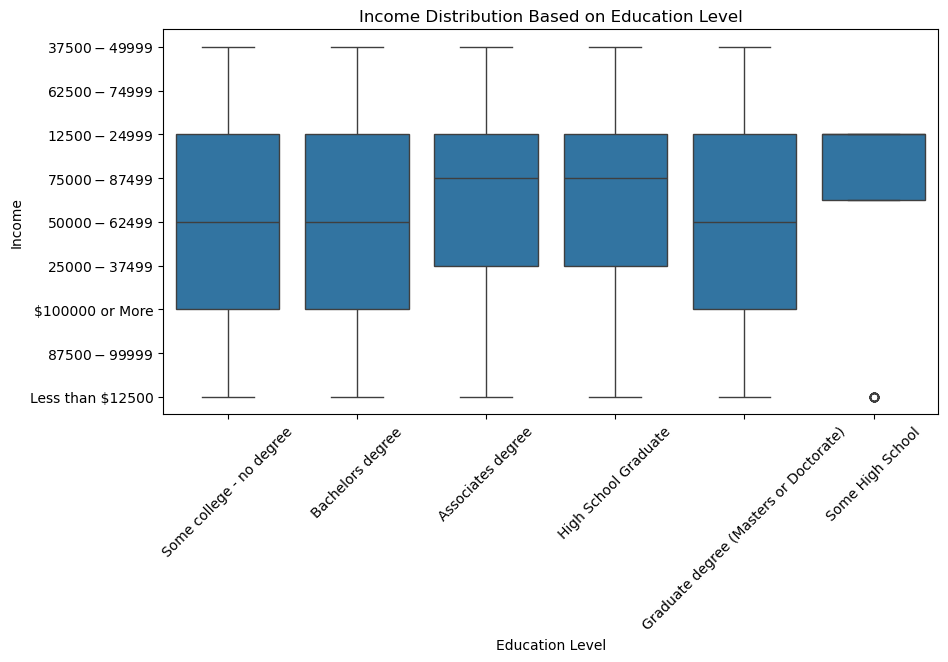

In [33]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="education", y="income", data=df)
plt.title("Income Distribution Based on Education Level")
plt.xlabel("Education Level")
plt.ylabel("Income")
plt.xticks(rotation=45)
plt.show()


# REMOVING OUTLIERS BY USING IQR METHOD

In [35]:
def remove_outliers_iqr(data, columns):
    df_clean = data.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

In [36]:
num_cols = df.select_dtypes(include=["number"]).columns

df_no_outliers = remove_outliers_iqr(df, num_cols)

print("Data shape before removing outliers:", df.shape)
print("Data shape after removing outliers:", df_no_outliers.shape)

Data shape before removing outliers: (12610, 26)
Data shape after removing outliers: (8429, 26)


# HISTOGRAM

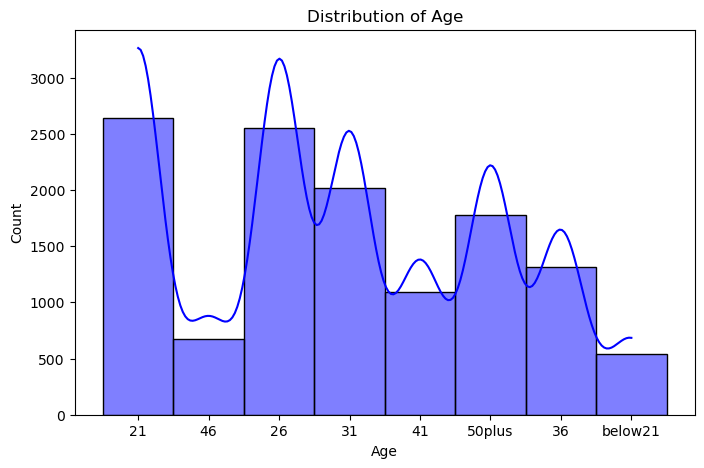

In [38]:
plt.figure(figsize=(8, 5))
sns.histplot(df["age"], bins=20, kde=True, color="blue")
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# ENCODING

In [40]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = encoder.fit_transform(df[column])

df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,1,0,2,55,2,4,0,0,0,3,...,4,0,1,0,1,0,0,0,1,1
1,1,1,2,80,0,2,1,0,0,3,...,4,0,1,0,1,0,0,0,1,0
2,1,1,2,80,0,1,1,0,0,3,...,4,0,1,0,1,1,0,0,1,1
3,1,1,2,80,2,2,1,0,0,3,...,4,0,1,0,1,1,0,0,1,0
4,1,1,2,80,2,2,0,0,0,3,...,4,0,1,0,1,1,0,0,1,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   destination           12610 non-null  int32
 1   passanger             12610 non-null  int32
 2   weather               12610 non-null  int32
 3   temperature           12610 non-null  int64
 4   time                  12610 non-null  int32
 5   coupon                12610 non-null  int32
 6   expiration            12610 non-null  int32
 7   gender                12610 non-null  int32
 8   age                   12610 non-null  int32
 9   maritalStatus         12610 non-null  int32
 10  has_children          12610 non-null  int64
 11  education             12610 non-null  int32
 12  occupation            12610 non-null  int32
 13  income                12610 non-null  int32
 14  car                   12610 non-null  int32
 15  Bar                   12610 non-null  int32
 16  CoffeeHou

# HEAT MAP

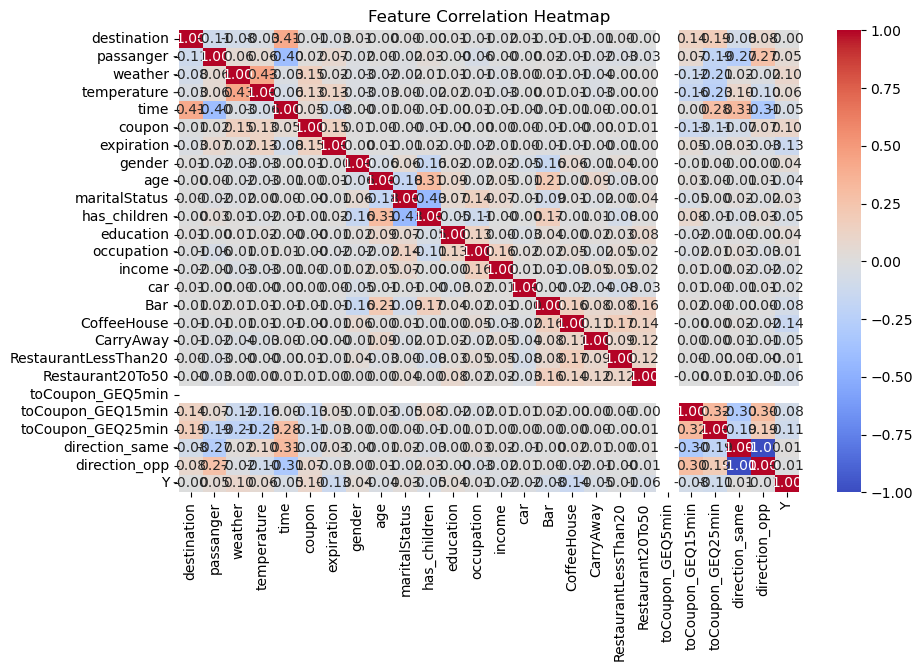

In [43]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# X AND Y SPLIT

In [45]:
X = df.drop(columns=["coupon"]) 
X

,destination,passanger,weather,temperature,time,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,1,0,2,55,2,0,0,0,3,1,...,4,0,1,0,1,0,0,0,1,1
1,1,1,2,80,0,1,0,0,3,1,...,4,0,1,0,1,0,0,0,1,0
2,1,1,2,80,0,1,0,0,3,1,...,4,0,1,0,1,1,0,0,1,1
3,1,1,2,80,2,1,0,0,3,1,...,4,0,1,0,1,1,0,0,1,0
4,1,1,2,80,2,0,0,0,3,1,...,4,0,1,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,0,3,0,55,3,0,1,1,2,0,...,4,0,1,0,1,0,0,1,0,1
12680,2,0,0,55,4,0,1,1,2,0,...,4,0,1,0,1,0,0,0,1,1
12681,2,0,1,30,4,0,1,1,2,0,...,4,0,1,0,1,0,0,1,0,0
12682,2,0,1,30,4,0,1,1,2,0,...,4,0,1,0,1,1,1,0,1,0


In [46]:
y = df["coupon"]
y

0        4
1        2
2        1
3        2
4        2
        ..
12679    1
12680    1
12681    2
12682    0
12683    3
Name: coupon, Length: 12610, dtype: int32

In [47]:
scalar = StandardScaler()
x_scale = scalar.fit_transform(X)

# TRAIN TEST SPLIT

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
X_train

,destination,passanger,weather,temperature,time,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
2874,1,1,2,80,0,1,0,3,1,1,...,0,1,0,0,1,1,0,0,1,0
11153,1,0,0,55,0,0,0,4,1,1,...,1,2,0,3,1,1,0,0,1,0
11863,2,0,0,55,4,0,1,1,3,0,...,3,0,4,4,1,0,0,0,1,0
8943,0,2,2,80,3,1,0,2,1,1,...,1,1,3,3,1,1,0,1,0,1
3058,1,2,2,80,2,0,0,4,1,1,...,2,1,2,3,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,2,0,1,30,4,0,1,0,2,0,...,3,3,3,3,1,0,0,1,0,0
5212,2,0,2,80,4,0,0,6,3,1,...,4,1,0,3,1,1,1,0,1,1
5411,2,0,2,80,4,0,0,1,3,0,...,0,0,0,0,1,0,0,1,0,1
860,1,1,2,80,0,1,0,1,3,0,...,0,0,0,3,1,1,0,0,1,1


In [51]:
X_test

,destination,passanger,weather,temperature,time,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
8199,1,1,1,30,1,0,1,2,2,1,...,1,0,0,3,1,1,0,0,1,0
11463,1,2,2,55,3,1,0,4,1,1,...,2,2,2,1,1,1,0,0,1,0
1945,1,1,2,80,2,0,1,4,1,1,...,1,1,0,3,1,1,0,0,1,0
8040,1,1,2,80,3,0,1,2,2,0,...,3,1,3,4,1,0,0,0,1,0
9433,1,0,2,80,1,0,1,3,2,0,...,3,2,2,4,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4908,0,0,2,80,3,0,0,2,1,1,...,0,1,1,4,1,0,0,0,1,1
3717,1,1,2,80,2,1,0,6,2,0,...,3,0,0,0,1,1,0,0,1,1
4122,0,0,2,80,3,1,1,2,1,1,...,4,0,0,4,1,1,1,0,1,0
2777,2,0,2,55,4,1,0,6,1,1,...,4,3,3,3,1,1,0,0,1,0


In [52]:
y_train

2874     1
11153    0
11863    1
8943     3
3058     4
        ..
12038    2
5212     1
5411     1
860      1
7313     0
Name: coupon, Length: 10088, dtype: int32

In [53]:
y_test

8199     1
11463    4
1945     2
8040     2
9433     4
        ..
4908     2
3717     2
4122     2
2777     2
2108     0
Name: coupon, Length: 2522, dtype: int32

# RANDOMFOREST CLASSIFIER

In [55]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [56]:
test_preds = model.predict(X_test)

# PERFORMANCE EVALUATION

## CONFUSION MATRIX

In [59]:
result=confusion_matrix(y_test,test_preds)
result

array([[352,   1,  31,   9,  13],
       [  3, 384,  51,   6,  10],
       [ 22,  34, 684,  13,  32],
       [ 29,  10,  41, 209,  15],
       [  5,  25,  63,   5, 475]], dtype=int64)

## ACCURACY SCORE

In [61]:
print("Accuracy:", accuracy_score(y_test, test_preds))

Accuracy: 0.8342585249801745


In [62]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       406
           1       0.85      0.85      0.85       454
           2       0.79      0.87      0.83       785
           3       0.86      0.69      0.77       304
           4       0.87      0.83      0.85       573

    accuracy                           0.83      2522
   macro avg       0.84      0.82      0.83      2522
weighted avg       0.84      0.83      0.83      2522



# KNN CLASSIFIER

In [64]:
knn_model = KNeighborsClassifier(n_neighbors=100)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [65]:
y_pred_knn = knn_model.predict(X_test)

# PERFORMANCE EVALUATION

## CONFUSION MATRIX

In [68]:
result=confusion_matrix(y_test,y_pred_knn)
result

array([[ 32,  88, 279,   0,   7],
       [ 11, 123, 313,   0,   7],
       [ 19,  65, 685,   0,  16],
       [  8,  49, 237,   0,  10],
       [ 12,  77, 469,   0,  15]], dtype=int64)

## ACCURACY SCORE

In [70]:
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

Accuracy: 0.33901665344964316


## CLASSIFICATION REPORT

In [72]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.39      0.08      0.13       406
           1       0.31      0.27      0.29       454
           2       0.35      0.87      0.49       785
           3       0.00      0.00      0.00       304
           4       0.27      0.03      0.05       573

    accuracy                           0.34      2522
   macro avg       0.26      0.25      0.19      2522
weighted avg       0.29      0.34      0.24      2522



# LOGISTICS REGRESSION

In [74]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression()

In [75]:
y_pred_lr = log_model.predict(X_test)

# PERFORMANCE EVALUATION

## CONFUSION MATRIX

In [78]:
result=confusion_matrix(y_test,y_pred_lr)
result

array([[108,  78, 139,   9,  72],
       [ 44, 150, 181,   2,  77],
       [ 35,  98, 525,  23, 104],
       [ 32,  25, 180,  25,  42],
       [ 29,  62, 308,   1, 173]], dtype=int64)

## ACCURACY SCORE

In [80]:
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

Accuracy: 0.38897700237906424


# CLASSIFICATION REPORT

In [82]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.44      0.27      0.33       406
           1       0.36      0.33      0.35       454
           2       0.39      0.67      0.50       785
           3       0.42      0.08      0.14       304
           4       0.37      0.30      0.33       573

    accuracy                           0.39      2522
   macro avg       0.40      0.33      0.33      2522
weighted avg       0.39      0.39      0.36      2522



# DECISIONTREE CLASSIFIER

In [84]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [85]:
y_pred_dt = dt_model.predict(X_test)

# PERFORMANCE EVALUATION

## CONFUSION MATRIX

In [88]:
result=confusion_matrix(y_test,y_pred_dt)
result

array([[342,   4,  27,  19,  14],
       [  6, 382,  41,  13,  12],
       [ 32,  33, 647,  36,  37],
       [ 24,  11,  26, 225,  18],
       [ 11,  25,  51,  23, 463]], dtype=int64)

## ACCURACY SCORE

In [90]:
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

Accuracy: 0.8164155432196669


# CLASSIFICATION REPORT

In [92]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       406
           1       0.84      0.84      0.84       454
           2       0.82      0.82      0.82       785
           3       0.71      0.74      0.73       304
           4       0.85      0.81      0.83       573

    accuracy                           0.82      2522
   macro avg       0.81      0.81      0.81      2522
weighted avg       0.82      0.82      0.82      2522



# SVM CLASSIFIER

In [94]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [95]:
y_pred_svm = svm_model.predict(X_test)

# PERFORMANCE EVALUATION

## CONFUSION MATRIX

In [98]:
result=confusion_matrix(y_test,y_pred_svm)
result

array([[170,  85, 118,   0,  33],
       [ 59, 125, 218,   0,  52],
       [ 67,  60, 592,   0,  66],
       [ 38,  14, 229,   0,  23],
       [ 44,  27, 374,   0, 128]], dtype=int64)

## ACCURACY SCORE

In [100]:
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

Accuracy: 0.40245836637589216


# CLASSIFICATION REPORT

In [102]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.45      0.42      0.43       406
           1       0.40      0.28      0.33       454
           2       0.39      0.75      0.51       785
           3       0.00      0.00      0.00       304
           4       0.42      0.22      0.29       573

    accuracy                           0.40      2522
   macro avg       0.33      0.33      0.31      2522
weighted avg       0.36      0.40      0.35      2522



### CHECKING THAT THE RANDOMFOREST CLASSIFIER MODEL IS UNDER FITTED OR OVER FITTED OR GOOD FIT

In [104]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [105]:
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [106]:
train_acc = accuracy_score(y_train, train_preds)
test_acc = accuracy_score(y_test, test_preds)
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Training Accuracy: 0.9891
Test Accuracy: 0.8343


##### . Overfitting: If training accuracy is very high (e.g., 100%) but test accuracy is much lower, the model is overfitting.

##### . Underfitting: If both training and test accuracy are low, the model is underfitting.

##### . Good Fit: If training and test accuracy are similar, the model has a good balance.

#### Here the train and test accuracy are almost similar,so the model has a good balance

## RANDOMFOREST CLASSIFIER IS GOOD FIT

# FROM THE ABOVE MODELS , RANDOMFOREST CLASSIFIER IS THE BEST ALGORITHM FOR THIS DATASET...!!!